In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
from scipy import stats
from scipy.stats import beta
from scipy.stats import norm
from scipy import optimize as opt
from scipy.stats import beta, uniform

%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
sns.set_context("notebook")
plt.style.use('dark_background')
np.random.seed(123)

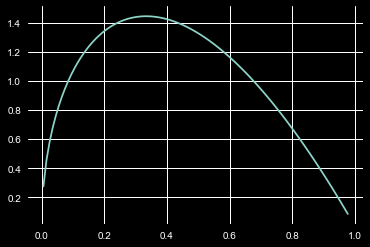

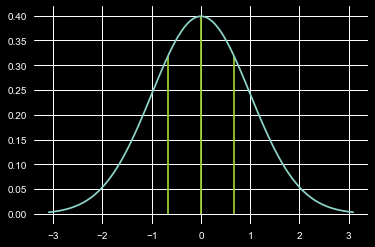

In [25]:
a, b = 0, 1
x = np.linspace(norm.ppf(0.001, a, b), norm.ppf(0.999, a, b), 100)
plt.plot(x, norm.pdf(x, a, b))
plt.vlines(norm.ppf(0.25,a,b), 0.0, norm.pdf(norm.ppf(0.25,a,b),a,b), color= 'yellowgreen')
plt.vlines(norm.ppf(0.5,a,b), 0.0, norm.pdf(norm.ppf(0.5,a,b),a,b), color= 'yellowgreen')
plt.vlines(norm.ppf(0.75,a,b), 0.0, norm.pdf(norm.ppf(0.75,a,b),a,b), color= 'yellowgreen')

In [42]:
f = norm.pdf
res = opt.fmin(lambda x: -f(x), -1)

Optimization terminated successfully.
         Current function value: -0.398942
         Iterations: 17
         Function evaluations: 34


In [52]:
y_max = f(res)
x_min = np.min(x)
x_max = np.max(x)

In [49]:
NMCS = 5000
x_mcs = uniform.rvs?

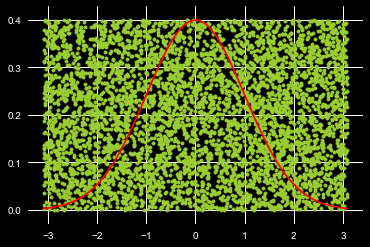

In [63]:
x_mcs = uniform.rvs(size=NMCS, loc=x_min, scale=(x_max - x_min))
r = uniform.rvs(size=NMCS, loc=0, scale=1)*y_max
plt.scatter(x_mcs, r, marker='.', color='yellowgreen')
plt.plot(x, norm.pdf(x,a,b), label = 'target', color= 'red')

In [72]:
x_accept = x_mcs[r < f(x_mcs, a, b)]
r_accept = r[r<f(x_mcs, a, b)]
x_other = x_mcs[r>=f(x_mcs, a, b)]
r_other = r[r>=f(x_mcs, a, b)]

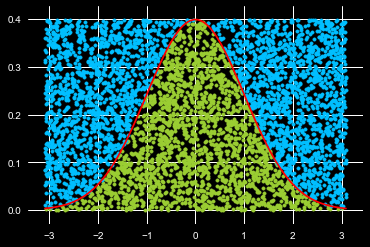

In [73]:
plt.scatter(x_accept, r_accept, marker='.', color='yellowgreen')
plt.scatter(x_other, r_other, marker='.', color='deepskyblue')
plt.plot(x, norm.pdf(x,a,b), label = 'target', color= 'red')

In [80]:
ratio = x_accept.shape[0] / (x_accept.shape[0] + x_other.shape[0])

In [81]:
S = (x_max - x_min) * y_max

In [82]:
norm_S = S * ratio

In [83]:
norm_S

array([0.9936564])

In [91]:
f = beta(a=a, b=b).pdf
res = opt.fmin(lambda x: -f(x), 0.3)
y_max = f(res)
NMCS = 5000
x_mcs = uniform.rvs(size=NMCS) # 一様分布
r = uniform.rvs(size=NMCS)* y_max # 一様分布

Optimization terminated successfully.
         Current function value: -1.443376
         Iterations: 10
         Function evaluations: 20


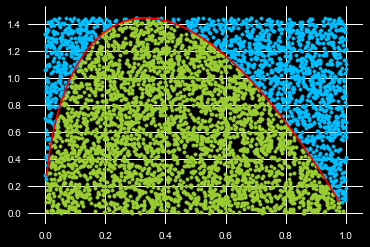

In [88]:
x_accept = x_mcs[r < f(x_mcs)]
r_accept = r[r<f(x_mcs)]
x_other = x_mcs[r>=f(x_mcs)]
r_other = r[r>=f(x_mcs)]
plt.scatter(x_accept, r_accept, marker='.', color='yellowgreen')
plt.scatter(x_other, r_other, marker='.', color='deepskyblue')
plt.plot(x, beta.pdf(x,a,b), label = 'target', color= 'red')

In [92]:
ratio = x_accept.shape[0] / (x_accept.shape[0] + x_other.shape[0])
S = 1.0 * y_max
beta_S = S * ratio
beta_S

array([0.99968199])

### ここからlessen

#### ランダムウォークM-Hアルゴリズム
1. 初期値 $\theta$を適当に決める
2. 現在の$\theta$からランダムウォークで新しい $\theta$を探してくる  
    $\theta_{new} = \theta + \epsilon  Normal(0, 1)$  
3. 次の条件式を判定する
    $f(\theta) > f(\theta')$  
    元の式  $q(\theta' | \theta) f(\theta) > q(\theta | \theta') f(\theta ')$  
4. 真の場合は確率r で $\theta_{new}$を受け入れる  
     $r = \frac{f(\theta')}{f(\theta)}$  
   偽の場合は必ず$\theta '$を受け入れる  
5. 2-4を繰り返す


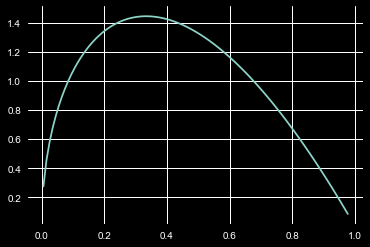

In [93]:
a, b = 1.5, 2.0
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

In [114]:
theta = 0.8
NMCS = 20000
epsilon = 0.5
theta_mcs = [theta]
for i in range(NMCS):
    theta_new = theta + epsilon * np.random.randn()
    if beta.pdf(theta_new, a, b) > beta.pdf(theta, a, b):
        theta = theta_new
    else:
        r = beta.pdf(theta_new, a, b) / beta.pdf(theta, a, b)
        if np.random.rand() < r:
            theta = theta_new
    theta_mcs.append(theta)
df = pd.DataFrame(theta_mcs)

In [115]:
df.head()

,0
0,0.800000
1,0.267584
2,0.267584
3,0.267584
4,0.233097


Text(0,0.5,'$\\Theta$')

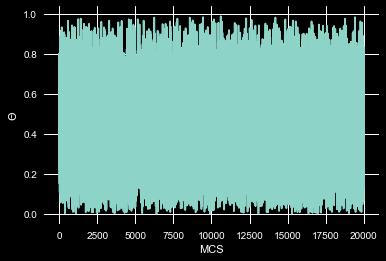

In [116]:
plt.plot(df[0])
plt.xlabel('MCS')
plt.ylabel("$\Theta$")

/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


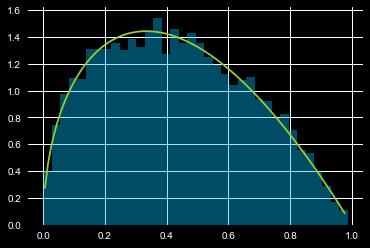

In [124]:
sns.distplot(df, kde=False, norm_hist=True, color='deepskyblue')
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)
plt.plot(x, beta.pdf(x, a, b), color = 'yellowgreen')